In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from tqdm import tqdm
pi = 3.141592

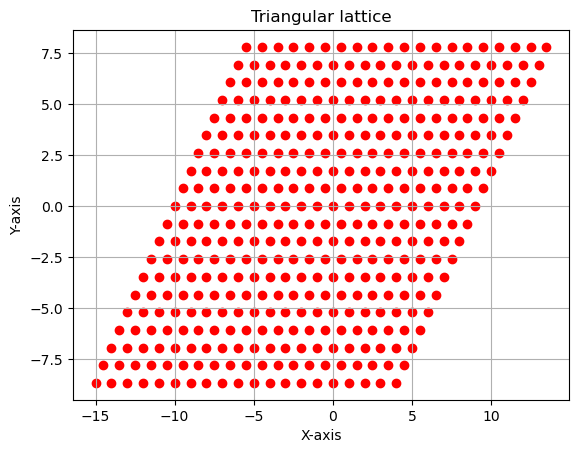

In [21]:
# Defining the Base lattice  - (TRIANGULAR LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [1/2, np.sqrt(3)/2]
# number of points along each direction vectors
n = 10
# Lattice generation and visualization
triX_x = []
triX_y = []
for i in range(-n, n):
    for j in range(-n, n):
        triX_x.append((A1[0] * i) + (A2[0] * j))
        triX_y.append((A1[1] * i) + (A2[1] * j))
#print(triX_x)
#print(triX_y)
# Plot the points
g = plt.figure();
plt.scatter(triX_x, triX_y, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [22]:
# Size of skyrmion
size = 3
# skyrmion crystal translation vectors
T1 = np.round(np.array([size + size/2, np.sqrt(3) * size/2 , 0]), 6)
T2 = np.round(np.array([0, np.sqrt(3) * size, 0]), 6)
T3 = np.round(np.array([0, 0, 1]), 6)
# area of skyrmion unit cell
area = np.dot(T1, np.cross(T2, T3))
# reciprocal lattice vectors of SkX
B1 = np.round((2 * pi * np.cross(T2, T3))/area, 6)
B2 = np.round((2 * pi * np.cross(T3, T1))/area, 6)
print(T1)
print(T2)
#print(T3)
#print(area)
#print(B1)
#print(B2)

[4.5      2.598076 0.      ]
[0.       5.196152 0.      ]


In [23]:
# Triple - Q texture formation
e_vectors = np.round([[-1, 0], [1/2, -np.sqrt(3)/2], [1/2, np.sqrt(3)/2]], 6)
Q_vectors = np.round([[B1[0], B1[1]], [B2[0], B2[1]], [B2[0], -B2[1]]], 6)
#print(Q_vectors)
# spin texture definition
def spin_tex(x, y):
    point = np.array([x, y])
    mx = np.sum([np.sin(np.dot(Q_vectors[i], point) + pi/3) * e_vectors[i][0] for i in range(3)])
    my = np.sum([np.sin(np.dot(Q_vectors[i], point) + pi/3) * e_vectors[i][1] for i in range(3)])
    mz = np.sum([np.cos(np.dot(Q_vectors[i], point) + pi/3) for i in range(3)])
    m = [mx, my, mz]
    m = np.round(m / np.linalg.norm(m), 6)
    return m
print(spin_tex(0,1))

[-0.429453 -0.621575  0.655145]


[0.0, 0.0, 0.5, 1.0, 1.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 2.0, 2.5, 3.0, 3.5, 4.0, 3.5, 4.0]
[5.196152422706632, 3.4641016151377544, 4.330127018922193, 5.196152422706632, 6.06217782649107, 1.7320508075688772, 2.598076211353316, 3.4641016151377544, 4.330127018922193, 5.196152422706632, 6.06217782649107, 6.928203230275509, 0.8660254037844386, 1.7320508075688772, 2.598076211353316, 3.4641016151377544, 4.330127018922193, 5.196152422706632, 6.06217782649107, 6.928203230275509, 1.7320508075688772, 2.598076211353316, 3.4641016151377544, 4.330127018922193, 5.196152422706632, 2.598076211353316, 3.4641016151377544]


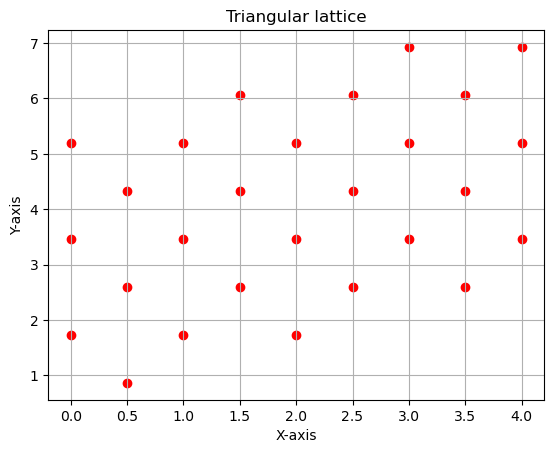

In [24]:
# Isolating a unit cell from SkX
unitcell_x = []
unitcell_y = []
# Bounds of unit cell
Xlow = 0
Xhigh = size + size/2
def Ylow(x):
    return T1[1] * (x) / T1[0] + np.sqrt(3)/4
def Yhigh(x):
    return T1[1] * (x) / T1[0] + np.linalg.norm(T2) + np.sqrt(3)/4
for i in range(len(triX_x)):
    [x, y] = [triX_x[i], triX_y[i]]
    if x >= Xlow and x < Xhigh and y >= Ylow(x) and y < Yhigh(x):
        unitcell_x.append(x)  
        unitcell_y.append(y)

print(unitcell_x)
print(unitcell_y)

g = plt.figure();
plt.scatter(unitcell_x, unitcell_y, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [25]:
# spin texture in unit cell
spins_cart = [spin_tex(unitcell_x[i], unitcell_y[i]) for i in range(len(unitcell_x))]

# getting the theta phi profile of skyrmion
def theta_profile(x, y, z):
    return np.arccos(z/np.linalg.norm([x, y, z]))
def phi_profile(x, y, z):
    [x, y, z] = np.round([x, y, z], 3)
    # Calculate the denominator and check for zero to avoid division by zero
    value = np.arctan2(y, x)
    if x == 0 and y == 0:
        return 0  # or some appropriate value or error handling
    elif value < 0:
        return value + (2*pi)
    else:
        return value

theta = [theta_profile(spins_cart[i][0], spins_cart[i][1], spins_cart[i][2]) for i in range(len(unitcell_x))]
phi = [phi_profile(spins_cart[i][0], spins_cart[i][1], spins_cart[i][2]) for i in range(len(unitcell_x))]

#print(theta)
#print(phi)

In [26]:

chi_ket = [[np.cos(theta[i]/2), np.sin(theta[i]/2) * np.exp(1j * phi[i])] for i in range(len(unitcell_x))]
chi_bra = [[np.cos(theta[i]/2), np.sin(theta[i]/2) * np.exp(-1j * phi[i])] for i in range(len(unitcell_x))]

In [27]:
# neighbour table formation
D1 = [1, 0]
D2 = [-1, 0]
D3 = [1/2, np.sqrt(3)/2]
D4 = [1/2, -np.sqrt(3)/2]
D5 = [-1/2, np.sqrt(3)/2]
D6 = [-1/2, -np.sqrt(3)/2]
NN1 = []
NN2 = []
NN3 = []
NN4 = []
NN5 = []
NN6 = []

def neig_1(i, j):
    [x, y] = np.round([unitcell_x[i], unitcell_y[i]], 3)
    [x1, y1] = np.round([unitcell_x[j], unitcell_y[j]], 3)
    # NN1 
    if np.allclose([x1, y1], np.round([x + D1[0] , y + D1[1]], 3)):
        NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + D1[0] + T2[0], y + D1[1] + T2[1]], 3)):
        NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + D1[0] - T1[0], y + D1[1] - T1[1]], 3)):
        NN1.append(j)
    elif np.allclose([x1, y1], np.round([x + D1[0] + T2[0] - T1[0], y + D1[1] + T2[1] - T1[1]], 3)):
        NN1.append(j)
    return 

def neig_2(i, j):
    [x, y] = np.round([unitcell_x[i], unitcell_y[i]], 3)
    [x1, y1] = np.round([unitcell_x[j], unitcell_y[j]], 3)
    # NN1 
    if np.allclose([x1, y1], np.round([x + D2[0] , y + D2[1]], 3)):
        NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + D2[0] + T1[0], y + D2[1] + T1[1]], 3)):
        NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + D2[0] - T2[0], y + D2[1] - T2[1]], 3)):
        NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + D2[0] + T1[0] - T2[0], y + D2[1] + T1[1] - T2[1]], 3)):
        NN2.append(j)
    return 

def neig_3(i, j):
    [x, y] = np.round([unitcell_x[i], unitcell_y[i]], 3)
    [x1, y1] = np.round([unitcell_x[j], unitcell_y[j]], 3)
    # NN1 
    if np.allclose([x1, y1], np.round([x + D3[0] , y + D3[1]], 3)):
        NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + D3[0] - T1[0], y + D3[1] - T1[1]], 3)):
        NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + D3[0] - T2[0], y + D3[1] - T2[1]], 3)):
        NN3.append(j)
    return 

def neig_4(i, j):
    [x, y] = np.round([unitcell_x[i], unitcell_y[i]], 3)
    [x1, y1] = np.round([unitcell_x[j], unitcell_y[j]], 3)
    # NN1 
    if np.allclose([x1, y1], np.round([x + D4[0] , y + D4[1]], 3)):
        NN4.append(j)
    elif np.allclose([x1, y1], np.round([x + D4[0] - T1[0], y + D4[1] - T1[1]], 3)):
        NN4.append(j)
    elif np.allclose([x1, y1], np.round([x + D4[0] + T2[0], y + D4[1] + T2[1]], 3)):
        NN4.append(j)
    elif np.allclose([x1, y1], np.round([x + D4[0] - T1[0] + T2[0], y + D4[1] - T1[1] + T2[1]], 3)):
        NN4.append(j)
    return 

def neig_5(i, j):
    [x, y] = np.round([unitcell_x[i], unitcell_y[i]], 3)
    [x1, y1] = np.round([unitcell_x[j], unitcell_y[j]], 3)
    # NN1 
    if np.allclose([x1, y1], np.round([x + D5[0] , y + D5[1]], 3)):
        NN5.append(j)
    elif np.allclose([x1, y1], np.round([x + D5[0] + T1[0], y + D5[1] + T1[1]], 3)):
        NN5.append(j)
    elif np.allclose([x1, y1], np.round([x + D5[0] - T2[0], y + D5[1] - T2[1]], 3)):
        NN5.append(j)
    elif np.allclose([x1, y1], np.round([x + D5[0] + T1[0] - T2[0], y + D5[1] + T1[1] - T2[1]], 3)):
        NN5.append(j)
    return 

def neig_6(i, j):
    [x, y] = np.round([unitcell_x[i], unitcell_y[i]], 3)
    [x1, y1] = np.round([unitcell_x[j], unitcell_y[j]], 3)
    # NN1 
    if np.allclose([x1, y1], np.round([x + D6[0] , y + D6[1]], 3)):
        NN6.append(j)
    elif np.allclose([x1, y1], np.round([x + D6[0] + T1[0], y + D6[1] + T1[1]], 3)):
        NN6.append(j)
    elif np.allclose([x1, y1], np.round([x + D6[0] + T2[0], y + D6[1] + T2[1]], 3)):
        NN6.append(j)
    return 

for i in range(len(unitcell_x)):
    for j in range(len(unitcell_x)):
        neig_1(i, j)
        neig_2(i, j)
        neig_3(i, j)
        neig_4(i, j)
        neig_5(i, j)
        neig_6(i, j)
        
print(NN1)
print(NN2)
print(NN3)
print(NN4)
print(NN5)
print(NN6)

[3, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 4, 20, 21, 22, 23, 24, 1, 2, 11, 25, 26, 5, 6, 0, 12]
[25, 18, 19, 0, 12, 23, 24, 1, 2, 3, 4, 20, 26, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 21, 22]
[12, 2, 3, 4, 20, 6, 7, 8, 9, 10, 11, 25, 13, 14, 15, 16, 17, 18, 19, 0, 21, 22, 23, 24, 1, 26, 5]
[2, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 3, 4, 20, 21, 22, 23, 24, 1, 10, 11, 25, 26, 5, 19, 0]
[26, 19, 0, 12, 13, 24, 1, 2, 3, 4, 20, 21, 5, 6, 7, 8, 9, 10, 11, 25, 14, 15, 16, 17, 18, 22, 23]
[19, 24, 1, 2, 3, 26, 5, 6, 7, 8, 9, 10, 0, 12, 13, 14, 15, 16, 17, 18, 4, 20, 21, 22, 23, 11, 25]


In [28]:
# Hamiltonian definition
t = 1
def H(kx, ky):
    k = [kx, ky]
    Hij = np.zeros((len(unitcell_x),len(unitcell_x)), dtype=np.complex128)
    for i in range(0,len(unitcell_x)):
        n1, n2, n3, n4, n5, n6 = int(NN1[i]), int(NN2[i]), int(NN3[i]), int(NN4[i]), int(NN5[i]), int(NN6[i])  
        Hij[i][i] = 0
        Hij[n1][i] = t * np.exp(1j * np.dot(k, D1)) * np.dot(chi_bra[n1], chi_ket[i])
        Hij[n2][i] = t * np.exp(1j * np.dot(k, D2)) * np.dot(chi_bra[n2], chi_ket[i])
        Hij[n3][i] = t * np.exp(1j * np.dot(k, D3)) * np.dot(chi_bra[n3], chi_ket[i])
        Hij[n4][i] = t * np.exp(1j * np.dot(k, D4)) * np.dot(chi_bra[n4], chi_ket[i])
        Hij[n5][i] = t * np.exp(1j * np.dot(k, D5)) * np.dot(chi_bra[n5], chi_ket[i])
        Hij[n6][i] = t * np.exp(1j * np.dot(k, D6)) * np.dot(chi_bra[n6], chi_ket[i])
    return Hij  

([<matplotlib.axis.YTick at 0x7fc480fe9a00>,
 [Text(0, 5.0, '$5.0$'),
  Text(0, 4.0, '$4.0$'),
  Text(0, 3.0, '$3.0$'),
  Text(0, 2.0, '$2.0$'),
  Text(0, 1.0, '$1.0$'),
  Text(0, 0.0, '$0$'),
  Text(0, -1.0, '$-1.0$'),
  Text(0, -2.0, '$-2.0$'),
  Text(0, -3.0, '$-3.0$')])

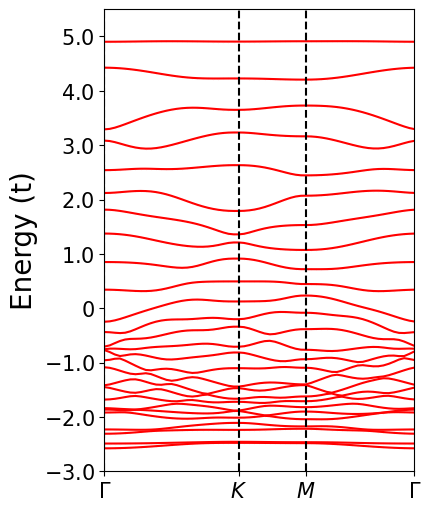

In [43]:
# Path in the reciprocal space
GK = []
KM = []
MG = []

Len = np.linalg.norm(B1)/2
d = 25
for i in range(0, int(d+1)):
    GK.append([0 + (Len * i/d), 0 + (Len * i/(np.sqrt(3)*d))])

for i in range(0, int( (d/2) + 1)):
    KM.append([Len , Len * (1 - (2*i/d))/np.sqrt(3)])
    
for i in range(0, int((0.87*d) + 1)):
    MG.append([Len * (1 - (i/(0.87 * d))), 0])
###############################################    
   
# Obtaining band
slno  = [0]
band = np.zeros((len(unitcell_x), len(GK) + len(KM) + len(MG)))
for i in range(0, len(GK)):
    slno.append(slno[-1]+1)
    eigen = np.sort(np.linalg.eigvalsh(H(GK[i][0], GK[i][1])))
    for b_index in range(0, len(unitcell_x)):
        band[b_index][i] = eigen[b_index]

for i in range(0, len(KM)): 
    slno.append(slno[-1]+1)
    eigen = np.sort(np.linalg.eigvalsh(H(KM[i][0], KM[i][1])))
    for b_index in range(0, len(unitcell_x)):
        band[b_index][len(GK) + i] = eigen[b_index]

for i in range(0, len(MG)): 
    slno.append(slno[-1]+1)
    eigen = np.sort(np.linalg.eigvalsh(H(MG[i][0], MG[i][1])))
    for b_index in range(0, len(unitcell_x)):
        band[b_index][len(GK) + len(KM) + i] = eigen[b_index]

# Remove the last element
slno = slno[:-1]
    
f = plt.figure(figsize=(4,6));   
for b_index in range(0, len(unitcell_x)):
    plt.plot( slno, band[b_index], c = 'red', marker='o', linestyle='-', markersize=0.02 )

plt.axvline(len(GK),c='k', linestyle='--')
plt.axvline(len(GK) + len(KM),c='k', linestyle='--')
plt.axvline(0,c='k', linestyle='--')
#plt.axvline(len(GK) + len(KM) + len(MG)-1,c='k', linestyle='--')
plt.ylabel("Energy (t)", fontsize=20);         plt.axis('tight');
plt.xlim(0,len(GK) + len(KM) + len(MG)-1)
plt.ylim(-3, 5.5)
# Customize x-axis ticks with Greek symbols
plt.xticks([0, len(GK), len(GK) + len(KM) , len(GK) + len(KM) + len(MG)-1],
           [r'$\Gamma$', r'$K$', r'$M$', r'$\Gamma$'],fontsize=15)
plt.yticks([5.0, 4.0, 3, 2, 1, 0,  -1.0,  -2.0,  -3.0], [r'$5.0$', r'$4.0$', r'$3.0$', r'$2.0$', r'$1.0$',  r'$0$',  r'$-1.0$', r'$-2.0$', r'$-3.0$'], size=15)    


In [34]:
# define the derivative of the hamiltonian (kx):
def H_dx(kx, ky):
    k = [kx, ky]
    Hij = np.zeros((len(unitcell_x),len(unitcell_x)), dtype=np.complex128)
    for i in range(0,len(unitcell_x)):
        n1, n2, n3, n4, n5, n6 = int(NN1[i]), int(NN2[i]), int(NN3[i]), int(NN4[i]), int(NN5[i]), int(NN6[i])  # Convert to integers
        Hij[i][i] = 0
        Hij[n1][i] = t * (1j * D1[0]) * np.exp(1j * np.dot(k, D1)) * np.dot(chi_bra[n1], chi_ket[i])
        Hij[n2][i] = t * (1j * D2[0]) * np.exp(1j * np.dot(k, D2)) * np.dot(chi_bra[n2], chi_ket[i])
        Hij[n3][i] = t * (1j * D3[0]) * np.exp(1j * np.dot(k, D3)) * np.dot(chi_bra[n3], chi_ket[i])
        Hij[n4][i] = t * (1j * D4[0]) * np.exp(1j * np.dot(k, D4)) * np.dot(chi_bra[n4], chi_ket[i])
        Hij[n5][i] = t * (1j * D5[0]) * np.exp(1j * np.dot(k, D5)) * np.dot(chi_bra[n5], chi_ket[i])
        Hij[n6][i] = t * (1j * D6[0]) * np.exp(1j * np.dot(k, D6)) * np.dot(chi_bra[n6], chi_ket[i])
    return Hij 
                
def H_dy(kx, ky):
    k = [kx, ky]
    Hij = np.zeros((len(unitcell_x),len(unitcell_x)), dtype=np.complex128)
    for i in range(0,len(unitcell_x)):
        n1, n2, n3, n4, n5, n6 = int(NN1[i]), int(NN2[i]), int(NN3[i]), int(NN4[i]), int(NN5[i]), int(NN6[i])  # Convert to integers
        Hij[i][i] = 0
        Hij[n1][i] = t * (1j * D1[1]) * np.exp(1j * np.dot(k, D1)) * np.dot(chi_bra[n1], chi_ket[i])
        Hij[n2][i] = t * (1j * D2[1]) * np.exp(1j * np.dot(k, D2)) * np.dot(chi_bra[n2], chi_ket[i])
        Hij[n3][i] = t * (1j * D3[1]) * np.exp(1j * np.dot(k, D3)) * np.dot(chi_bra[n3], chi_ket[i])
        Hij[n4][i] = t * (1j * D4[1]) * np.exp(1j * np.dot(k, D4)) * np.dot(chi_bra[n4], chi_ket[i])
        Hij[n5][i] = t * (1j * D5[1]) * np.exp(1j * np.dot(k, D5)) * np.dot(chi_bra[n5], chi_ket[i])
        Hij[n6][i] = t * (1j * D6[1]) * np.exp(1j * np.dot(k, D6)) * np.dot(chi_bra[n6], chi_ket[i])
    return Hij 
###################

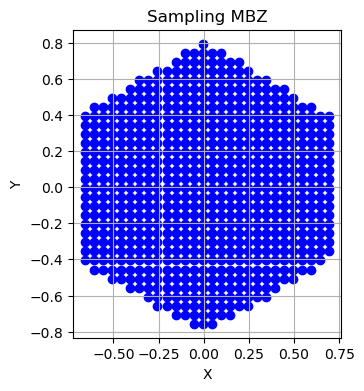

677


In [35]:
a =  np.linalg.norm(B1)/np.sqrt(3)
dx = 0.05
kx = np.arange(-a, a, dx)
ky = kx

domain = []

for i in range(len(kx)):
    for j in range(len(kx)):
        x = kx[i]
        y = ky[j]
        if x <= 0 and x >= - np.sqrt(3) * a/2 :
            if y <= (x /np.sqrt(3) + a) and y >= (- x /np.sqrt(3) - a):
                domain.append([x, y])
        elif x >= 0 and x <= np.sqrt(3) *a/2 :
            if y <= (-x/np.sqrt(3) + a) and y >= (x /np.sqrt(3) - a):
                domain.append([x, y])
x_coords = [val[0] for val in domain]
y_coords = [val[1] for val in domain]
# Plotting
plt.figure(figsize=(4,4))
plt.scatter(x_coords, y_coords, color='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampling MBZ')
plt.grid(True)
plt.show()

print(len(domain))

In [36]:
eta = 10**-5

def E_value(kx, ky):
    eigenvalues = np.linalg.eigvalsh(H(kx, ky))
    return eigenvalues

def sorted_kets(kx, ky):
    eigenvalues, eigenvectors = np.linalg.eigh(H(kx,ky))
    a = np.transpose(eigenvectors)
    return a

def b_curvature(kx, ky, band_index):
    berry_curvature = 0
    
    band_ev = E_value(kx, ky)[band_index]
    filtered_ev = [ev for ev in E_value(kx, ky) if ev != band_ev]
    band_ket = sorted_kets(kx, ky)[band_index]
    filtered_ket = [vec for index, vec in enumerate(sorted_kets(kx, ky)) if index != band_index]
    
    dh_x = H_dx(kx, ky)
    dh_y = H_dy(kx, ky)
    
    for i in range(0, len(filtered_ket)):
        berry_curvature += (np.dot(np.conj(band_ket), np.dot(dh_y, filtered_ket[i])) * np.dot(np.conj(filtered_ket[i]), np.dot(dh_x, band_ket)) - np.dot(np.conj(band_ket), np.dot(dh_x, filtered_ket[i])) * np.dot(np.conj(filtered_ket[i]), np.dot(dh_y, band_ket))) / ((band_ev - filtered_ev[i])**2 + 1j * eta)
    
    return berry_curvature.imag

b_c_band = []     
for i in tqdm(range(0, len(domain))):
    kx = domain[i][0]
    ky = domain[i][1]
    b_c_band.append(b_curvature(kx, ky, 0))


100%|██████████| 677/677 [00:05<00:00, 124.98it/s]


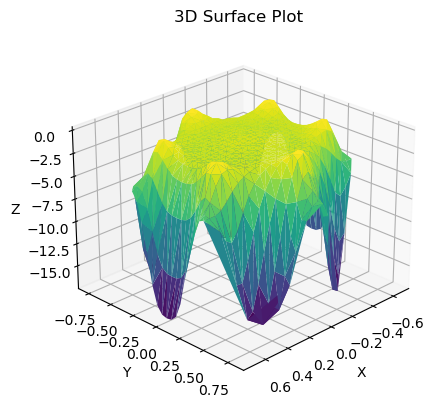

In [37]:
x, y = zip(*domain)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the z-values from the 'values' list
ax.plot_trisurf(x, y, b_c_band, cmap='viridis', linewidth=0.2)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')
ax.view_init(elev=  25, azim=45)
# Show the plot
plt.show()

In [38]:
# Band data and Berry curvature data generation
bands = []
for band_index in tqdm(range(0, len(unitcell_x))):
    for vec in domain:
        bands.append(E_value(vec[0], vec[1])[band_index])
            
berry_curvature = []
for band_index in tqdm(range(0, len(unitcell_x))):
    for vec in domain:
        berry_curvature.append(b_curvature(vec[0], vec[1], band_index))


100%|██████████| 27/27 [02:29<00:00,  5.54s/it]


In [39]:
Ef = [-5 + i/100 for i in range(1301)]
kT = 0.00000001;

# Kubo formula implimentation
sigma = []
for fermi_energy in tqdm(Ef):
    energies = []
    bc_list = []
    for i in range(len(bands)):
        if bands[i] <= fermi_energy:
            energies.append(bands[i])
            bc_list.append(berry_curvature[i])
    if energies != []:
        conductivity = 0
        for i in range(len(energies)):
            conductivity += bc_list[i]/(1 + np.exp((energies[i] - fermi_energy)/kT))
        sigma.append(2 * pi * conductivity/(area * len(domain)))
    else:
        sigma.append(0)  # Append a default value if no tuples were selected


100%|██████████| 1301/1301 [00:29<00:00, 44.41it/s]


(-3.0, 5.5)

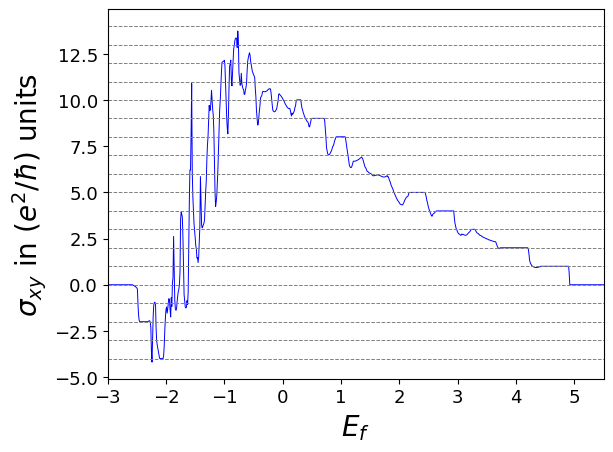

In [45]:
f = plt.figure();   
plt.plot( Ef, sigma,  color = 'blue', linestyle='-', linewidth=0.7)
# Add grid lines at specific y-values
for y_value in range(-4, 15):
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.7)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("$E_f$", fontsize=20); plt.axis('tight');
plt.ylabel("$\sigma_{xy}$ in ($e^2/\hbar$) units", fontsize=20); plt.axis('tight');
plt.xlim(-3,5.5)